#### Real Time Emotion Detection from Facial Expression using CNN(Training)

In [1]:
#https://www.kaggle.com/richadey/data-preprocessing-and-augmented-data-preparation?scriptVersionId=44713517

In [2]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Utils_funX import *
from Data_Preprocessing import *
from CNN_Model import *
from keras.layers import *

##### Importing the dataset

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

##### Exploratory Data Analysis : Training Data

In [4]:
print("\nThe shape of the Traning samples = {} \n".format(train_data.shape))
train_data


The shape of the Traning samples = (28709, 2) 



,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705,0,114 112 113 113 111 111 112 113 115 113 114 11...
28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...


In [5]:
# Description of the train dataset
train_data.describe()

,emotion
count,28709.000000
mean,3.317427
std,1.876632
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [6]:
#information of the training data set
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Data columns (total 2 columns):
emotion    28709 non-null int64
pixels     28709 non-null object
dtypes: int64(1), object(1)
memory usage: 448.7+ KB


In [7]:
# Looking For the no. of null values in the Training dataset
train_data[train_data.columns].isna().sum()

emotion    0
pixels     0
dtype: int64

In [8]:
# Looking for the Duplicate rows in the Test Dataset
train_data[train_data.duplicated()]

,emotion,pixels
675,5,255 255 255 255 255 255 255 237 217 146 185 11...
718,2,114 95 82 84 85 120 108 97 83 64 68 85 80 86 1...
1145,5,205 204 205 205 204 203 203 203 202 202 203 20...
1266,3,201 218 246 178 74 62 63 78 85 83 71 65 64 67 ...
1289,5,238 69 24 32 34 33 27 30 41 49 60 64 47 65 80 ...
...,...,...
28667,5,255 200 161 104 85 49 42 42 41 43 49 58 74 99 ...
28671,5,143 146 147 153 134 48 48 62 47 39 32 36 48 62...
28698,3,35 45 69 79 75 48 45 35 56 93 71 51 48 47 46 4...
28699,6,128 134 164 94 70 114 159 138 75 47 89 127 134...


##### Exploratory Data Analysis : Testing Data

In [9]:
print("\nThe shape of the Testing samples = {} \n".format(test_data.shape))
test_data


The shape of the Testing samples = (7178, 1) 



,pixels
0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,156 184 198 202 204 207 210 212 213 214 215 21...
2,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...
...,...
7173,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
7174,178 174 172 173 181 188 191 194 196 199 200 20...
7175,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
7176,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [10]:
test_data.describe()

,pixels
count,7178
unique,7092
top,42 41 47 48 46 54 59 62 73 82 97 100 97 103 10...
freq,3


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7178 entries, 0 to 7177
Data columns (total 1 columns):
pixels    7178 non-null object
dtypes: object(1)
memory usage: 56.2+ KB


In [12]:
# Looking For the no. of null values in the Testing dataset
test_data[test_data.columns].isnull().sum()

pixels    0
dtype: int64

In [13]:
# Looking for the Duplicate rows in the Test Dataset
test_data[test_data.duplicated()]

,pixels
696,67 82 94 112 99 88 64 76 137 157 164 184 198 2...
806,212 212 212 211 209 215 187 121 133 144 150 15...
953,251 251 251 249 255 231 72 7 3 9 17 24 51 70 1...
1101,42 41 47 48 46 54 59 62 73 82 97 100 97 103 10...
1433,49 38 30 43 46 38 79 116 140 150 157 166 171 1...
...,...
6851,42 41 47 48 46 54 59 62 73 82 97 100 97 103 10...
6898,214 215 213 210 93 35 43 96 118 118 118 119 11...
6901,133 183 181 194 181 179 207 205 211 194 195 21...
6927,20 18 18 18 19 19 20 20 21 19 19 20 19 19 19 1...


##### Cleaning the Data 

In [14]:
#Since we have no Null values in the dataset--> we only remov the Duplicates
train_data = remove_duplicates(train_data)
test_data = remove_duplicates(test_data)
print("\nThe shape of the Traning samples after Data Preprocessing is {} \n".format(train_data.shape))
print("\nThe shape of the Testing samples after after Data Preprocessing is {} \n".format(test_data.shape))


The shape of the Traning samples after Data Preprocessing is (27515, 2) 


The shape of the Testing samples after after Data Preprocessing is (7092, 1) 



##### Visualizing the Dataset

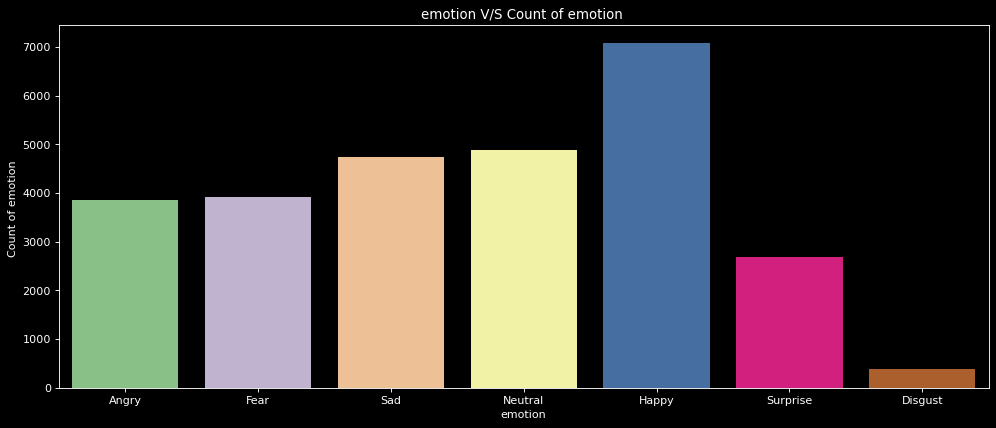

In [15]:
dictionary = {
    0:"Angry",
    1:"Disgust",
    2:"Fear",
    3:"Happy",
    4:"Sad",
    5:"Surprise",
    6:"Neutral" }
temp_dataset=train_data["emotion"].replace(dictionary)
temp_dataset=pd.DataFrame(temp_dataset)
Bar_Plots_For_Features(temp_dataset,"emotion")

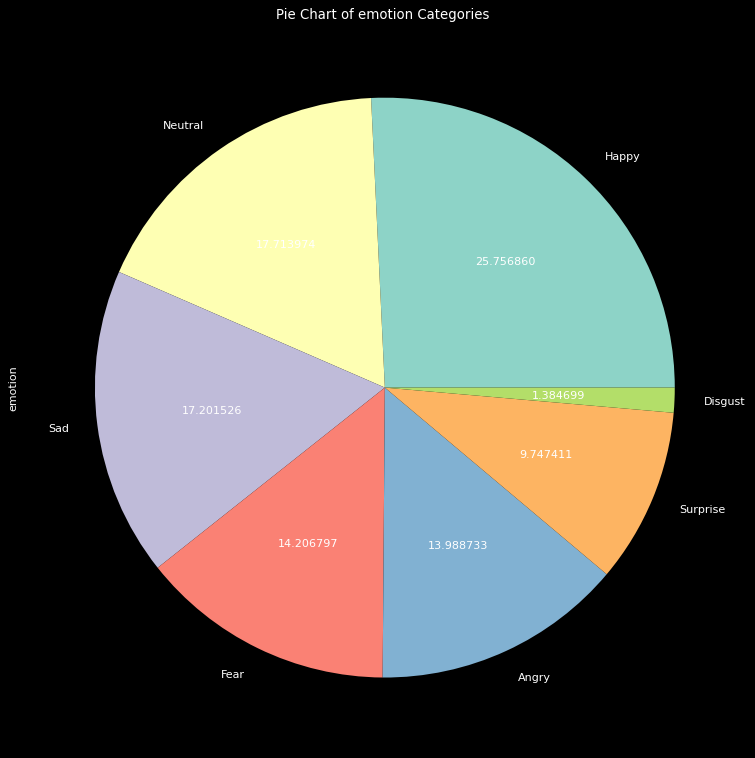

In [16]:
Pie_Plots_For_Features(temp_dataset,"emotion")

##### Train and Test Data Preparation 

In [17]:
x_train,y_train,x_test,y_test = Data_Preparation(train_data,test_data)

In [18]:
print("\nThe train and test data Shapes are :",x_train.shape,y_train.shape,x_test.shape,y_test.shape)


The train and test data Shapes are : (27515, 2304) (27515,) (7092, 2304) (0,)


##### Normalization

In [19]:
x_train,x_test=Data_Normalization(x_train,x_test)

In [20]:
x_train,y_train,x_test,y_test

(array([[0.01138692, 0.01301362, 0.01333896, ..., 0.01724305, 0.01773106,
         0.01333896],
        [0.02358511, 0.02342892, 0.02296034, ..., 0.03014521, 0.02858328,
         0.02873947],
        [0.0271399 , 0.02490762, 0.01832825, ..., 0.01033901, 0.01292376,
         0.01785829],
        ...,
        [0.0102539 , 0.01122386, 0.01205526, ..., 0.02605044, 0.02591187,
         0.02591187],
        [0.03209718, 0.03282008, 0.02935012, ..., 0.01966313, 0.01966313,
         0.01937397],
        [0.02237966, 0.02283873, 0.02352734, ..., 0.00068861, 0.00172151,
         0.00436117]]),
 array([0, 0, 2, ..., 4, 0, 4]),
 array([[0.03202291, 0.03202291, 0.03202291, ..., 0.00529513, 0.0162636 ,
         0.0226934 ],
        [0.01826705, 0.02154575, 0.0231851 , ..., 0.02014059, 0.01955511,
         0.01885253],
        [0.01083618, 0.01853144, 0.00957981, ..., 0.01382006, 0.01366301,
         0.01413415],
        ...,
        [0.00201967, 0.00201967, 0.00190087, ..., 0.01829584, 0.01580095,
 

In [24]:
height = 48
width =48


x_train = x_train.reshape(x_train.shape[0],width,height,)
x_test = x_test.reshape(x_test.shape[0],width,height,)

In [25]:
x_train.shape

(27515, 48, 48)

In [26]:
from keras.utils import to_categorical

y_train = to_categorical(y_train,7)
print(y_train.shape)
y_train

(27515, 7)


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [27]:
y_test = to_categorical(y_test,7)
print(y_test.shape)
y_test

(0, 7)


array([], shape=(0, 7), dtype=float32)

In [28]:
x_train[0]

array([[0.01138692, 0.01301362, 0.01333896, ..., 0.00845885, 0.00699482,
        0.00666948],
       [0.01057357, 0.00992289, 0.00943488, ..., 0.00910954, 0.00845885,
        0.00715749],
       [0.00813351, 0.00699482, 0.0087842 , ..., 0.00797084, 0.00910954,
        0.0076455 ],
       ...,
       [0.014803  , 0.01057357, 0.00683215, ..., 0.01171226, 0.00910954,
        0.00699482],
       [0.01252561, 0.01333896, 0.01285095, ..., 0.01708038, 0.01138692,
        0.00748283],
       [0.01252561, 0.01171226, 0.0136643 , ..., 0.01724305, 0.01773106,
        0.01333896]])

In [29]:
np.argmax(y_train[0])

0

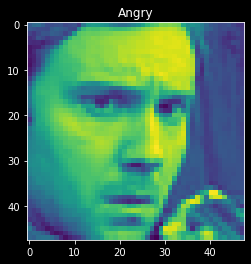

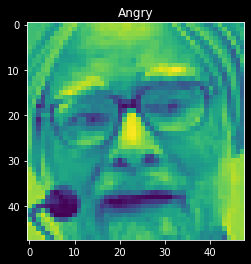

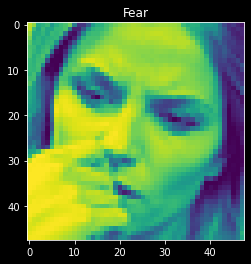

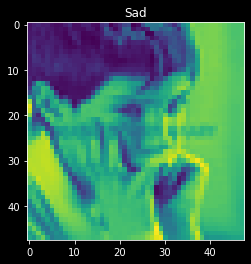

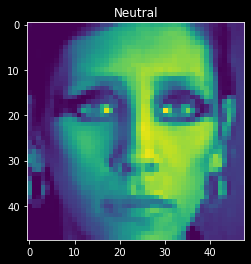

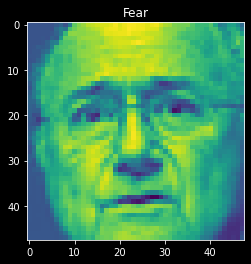

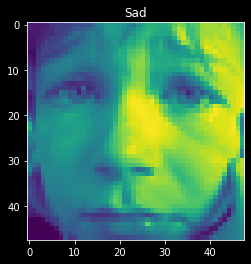

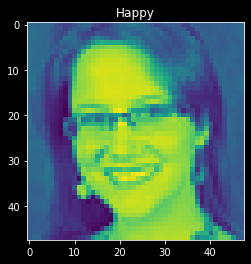

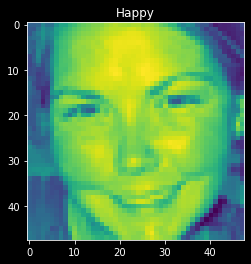

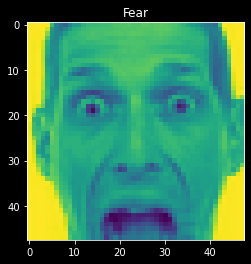

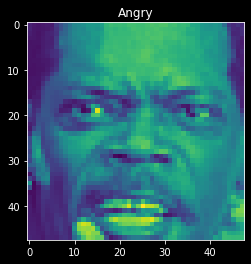

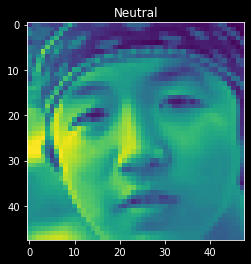

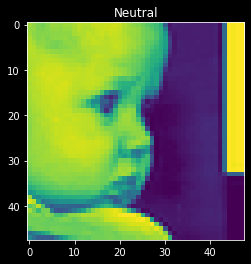

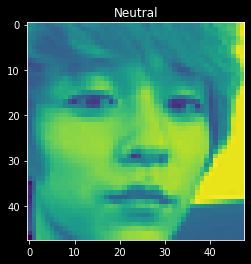

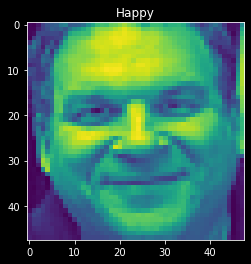

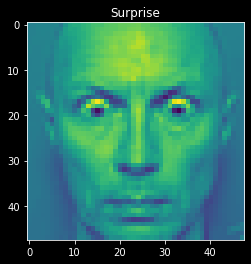

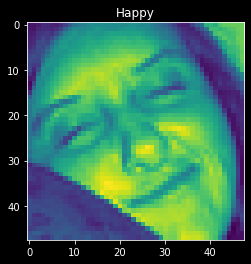

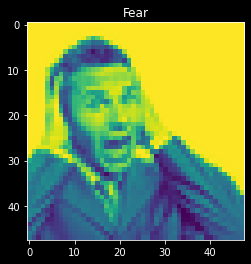

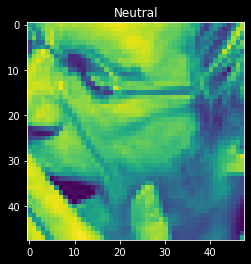

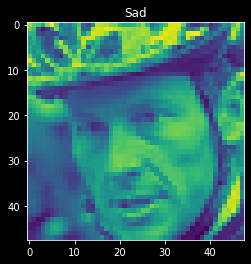

In [30]:
import matplotlib.pyplot as plt 
plt.style.use("dark_background")
for i in range(20):
    plt.imshow(x_train[i])
    plt.title(Decode_Y_Val(y_train[i]))
    plt.show()


#### Data Augmentation

In [ ]:
#!pip3 install import_ipynb

In [29]:
import import_ipynb
from Brightness_And_Sharpness_Augmented_data2 import *

importing Jupyter notebook from Brightness_And_Sharpness_Augmented_data2.ipynb


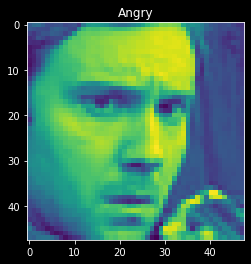

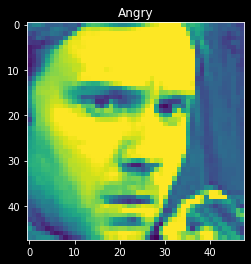

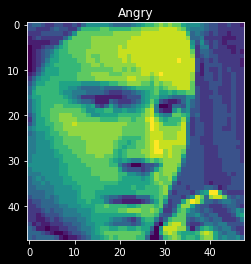

In [30]:
# Demonstration of Brightness Augmented Data

img1 = enhance_image_brighness(x_train[0],'increase')
img2 = enhance_image_brighness(x_train[0],'decrease')

plt.title(Decode_Y_Val(y_train[0]))
plt.imshow(x_train[0])
plt.show()

plt.title(Decode_Y_Val(y_train[0]))
plt.imshow(img1)
plt.show()

plt.title(Decode_Y_Val(y_train[0]))
plt.imshow(img2)
plt.show()

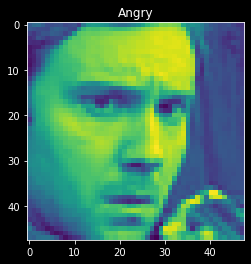

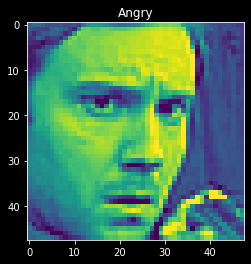

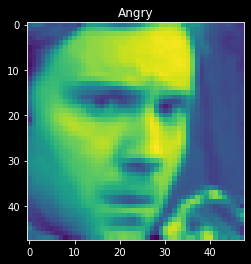

In [31]:
img1 = enhance_image_sharpness(x_train[0],'increase')
img2 = enhance_image_sharpness(x_train[0],'decrease')

plt.title(Decode_Y_Val(y_train[0]))
plt.imshow(x_train[0])
plt.show()

plt.title(Decode_Y_Val(y_train[0]))
plt.imshow(img1)
plt.show()

plt.title(Decode_Y_Val(y_train[0]))
plt.imshow(img2)
plt.show()


Five Sample of image after vertical flip :



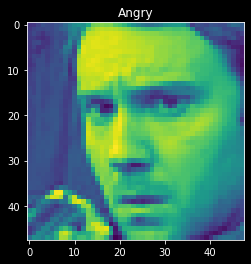

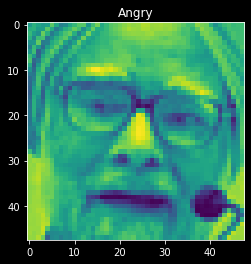

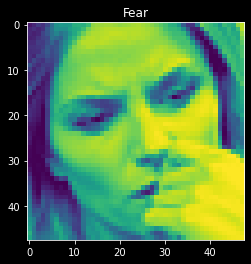

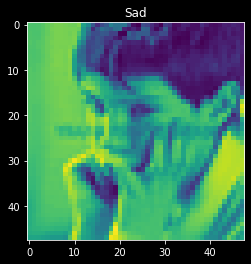

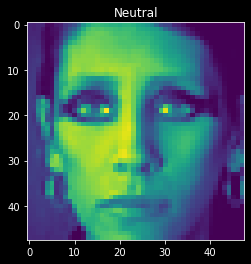

In [32]:
# adding two type of data 1 -> vertically flipped and horizontally fliped
# therefore After augmentation

x_train1,y_train1=Brightness_And_Sharpness_Augmented_data(x_train,y_train,len(x_train))
x_train2,y_train2=Data_Augmentation(x_train,y_train)

x_train = np.concatenate((x_train1,x_train2)) 
y_train = np.concatenate((y_train1,y_train2))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test1,y_train,y_test1 = train_test_split(x_train,y_train,test_size=0.20,random_state = 42)

In [ ]:
x_train1.shape,y_train1.shape

In [ ]:
x_train2.shape,y_train2.shape

In [ ]:
x_train.shape,y_train.shape

In [ ]:
x_test1.shape,y_test1.shape

In [ ]:
x_test.shape,y_test.shape

##### Initialize some values

In [40]:
num_features = 64
n_classes = 7
batch_size = 64
epochs = 100
width = 48
height = 48

##### Training the Model

In [41]:
from CNN_Model import *

In [42]:
model= CNN_Model_Initialize(height,width,n_classes)

In [43]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)       

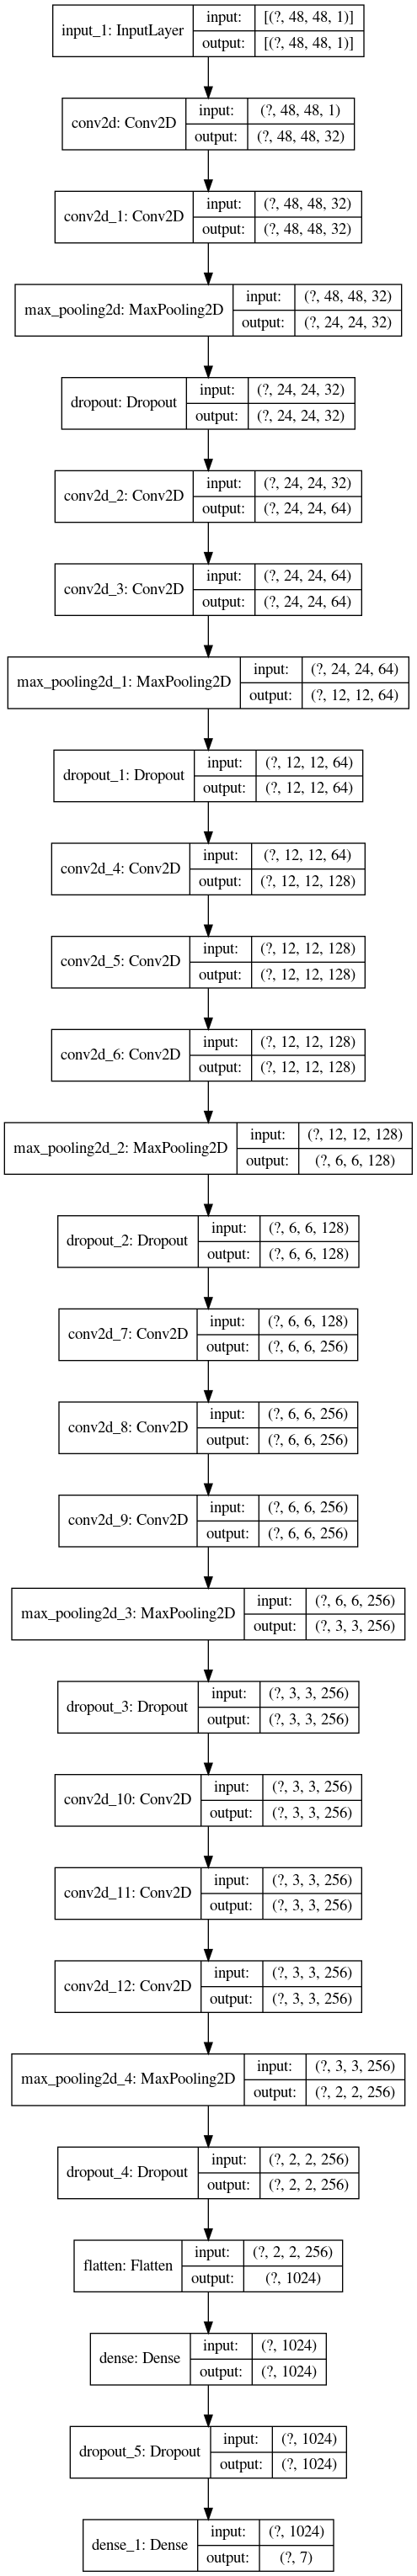

In [44]:
CNN_model_visualize(model)

In [45]:
x_train.shape,y_train.shape

((132072, 48, 48), (132072, 7))

In [46]:
from keras import *

In [47]:
#First Phase of Training
model,history=CNN_model_Compile_and_Train(model,x_train,y_train,1,200)
model.save('CNN_Model_Final.h5', include_optimizer=False)

Epoch 1/200
1651/1651 [==============================] - 31s 19ms/step - loss: 3.0409 - accuracy: 0.2545 - val_loss: 1.7954 - val_accuracy: 0.2606
Epoch 2/200
1651/1651 [==============================] - 29s 18ms/step - loss: 1.7996 - accuracy: 0.2553 - val_loss: 1.7953 - val_accuracy: 0.2606
Epoch 3/200
1651/1651 [==============================] - 29s 18ms/step - loss: 1.7980 - accuracy: 0.2553 - val_loss: 1.7997 - val_accuracy: 0.2606
Epoch 4/200
1651/1651 [==============================] - 29s 17ms/step - loss: 1.7965 - accuracy: 0.2553 - val_loss: 1.8031 - val_accuracy: 0.2606
Epoch 5/200
1651/1651 [==============================] - 29s 18ms/step - loss: 1.7952 - accuracy: 0.2553 - val_loss: 1.8046 - val_accuracy: 0.2606
Epoch 6/200
1651/1651 [==============================] - 29s 17ms/step - loss: 1.7925 - accuracy: 0.2561 - val_loss: 1.8171 - val_accuracy: 0.2606
Epoch 7/200
1651/1651 [==============================] - 29s 18ms/step - loss: 1.7701 - accuracy: 0.2692 - val_loss: 1

In [48]:
def plot_training_loss_vs_validation_loss(history):
    # Plotting the Training loss v/s validation Loss
    loss_train = history.history['loss']
    loss_val = history.history['val_loss']
    plt.plot(loss_train,color='r',label="Training Loss")
    plt.plot(loss_train,color='b',label="Validation Loss")
    plt.title('Training Loss V/S Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()    

In [49]:
def plot_training_accuracy_vs_validation_loss(history):
    # Plotting the Training loss v/s validation Loss
    loss_train = history.history['accuracy']
    loss_val = history.history['val_accuracy']
    plt.plot(loss_train,color='r',label="Training Accuracy")
    plt.plot(loss_train,color='b',label="Validation Accuracy")
    plt.title('Training Accuracy V/S Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [50]:
history.history

{'loss': [3.040944814682007,
  1.7995861768722534,
  1.7979674339294434,
  1.7965255975723267,
  1.7951524257659912,
  1.7925076484680176,
  1.7700642347335815,
  1.7439988851547241,
  1.7130134105682373,
  1.6729627847671509,
  1.6405596733093262,
  1.6108289957046509,
  1.5755352973937988,
  1.5083646774291992,
  1.4625277519226074,
  1.4327975511550903,
  1.4053616523742676,
  1.375567078590393,
  1.355060338973999,
  1.3349629640579224,
  1.3175522089004517,
  1.3012081384658813,
  1.28029203414917,
  1.266111135482788,
  1.2506440877914429,
  1.2372463941574097,
  1.222182035446167,
  1.210191249847412,
  1.198411226272583,
  1.1890403032302856,
  1.178572416305542,
  1.1683714389801025,
  1.1607614755630493,
  1.1529487371444702,
  1.1417065858840942,
  1.1304030418395996,
  1.1263099908828735,
  1.1189831495285034,
  1.1078622341156006,
  1.101525068283081,
  1.0953476428985596,
  1.0856225490570068,
  1.078869342803955,
  1.07217276096344,
  1.062360405921936,
  1.0522294044494

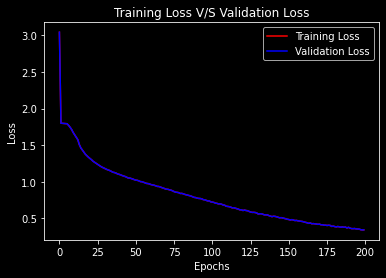

In [51]:
# Plotting the Training loss v/s validation Loss
plot_training_loss_vs_validation_loss(history)

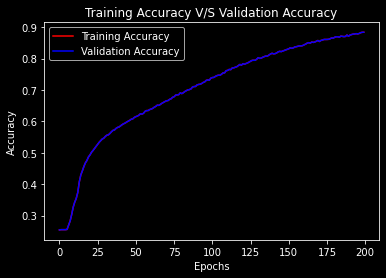

In [52]:
# Plotting the Training Accuracy v/s validation accuracy
plot_training_accuracy_vs_validation_loss(history)

##### TESTING AND EVALUATION OF THE PERFORMANCE THE MODEL

In [57]:
#First set of Test Samples(Not HAving test Results) 
x_test.shape,y_test.shape

((7092, 48, 48), (0, 7))

In [58]:
y_test = model.predict(x_test,batch_size=100)

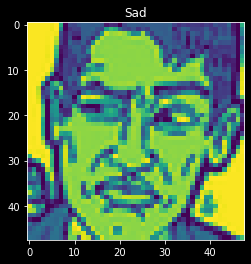

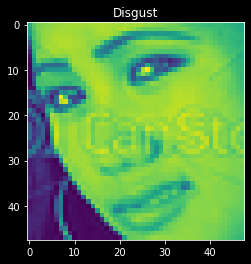

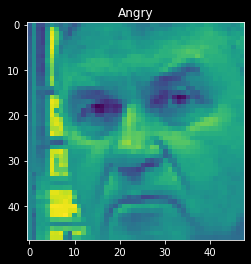

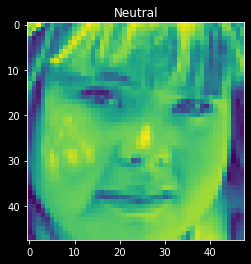

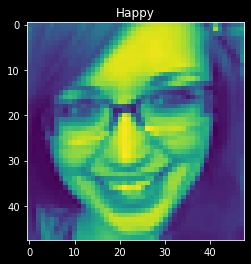

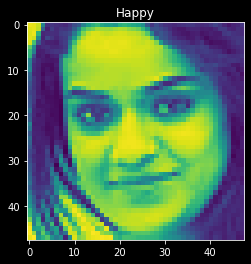

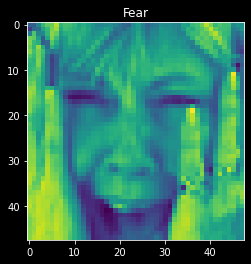

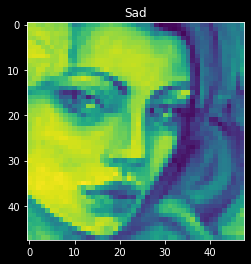

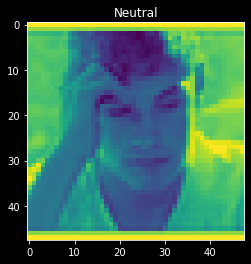

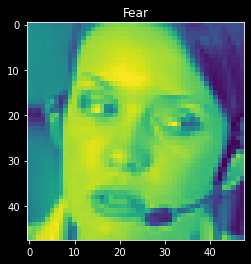

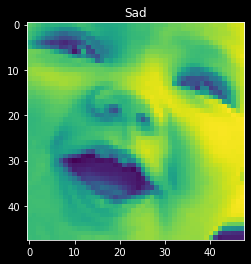

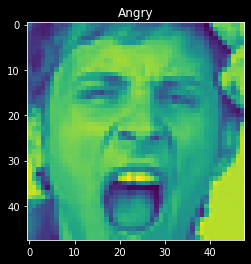

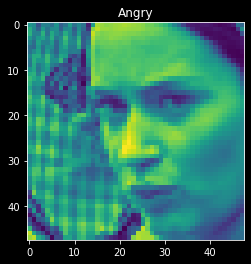

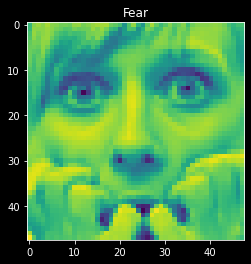

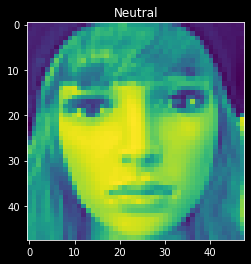

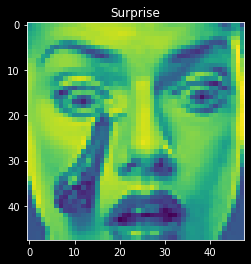

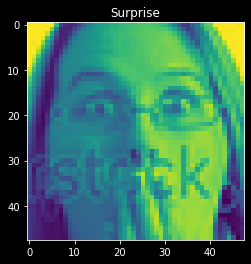

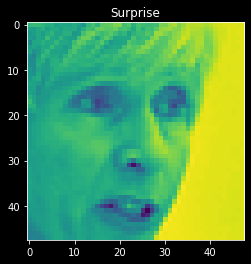

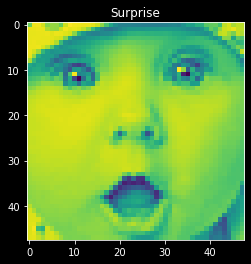

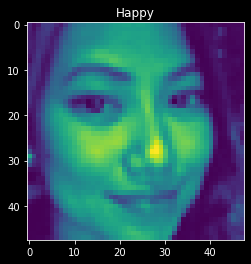

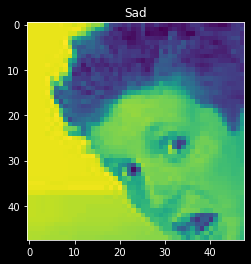

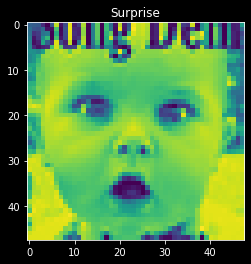

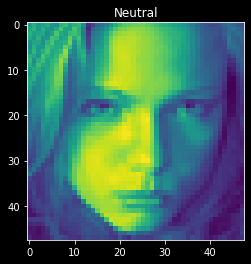

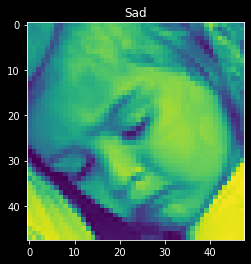

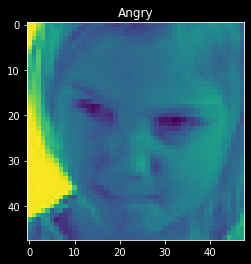

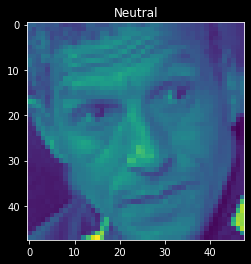

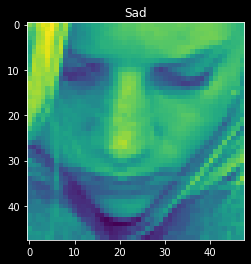

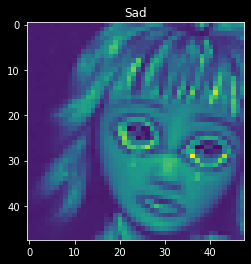

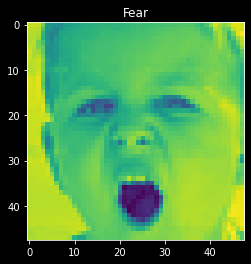

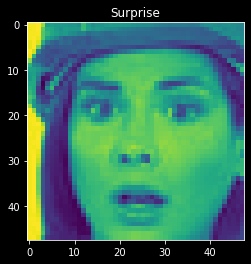

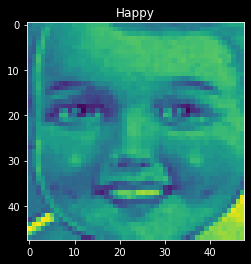

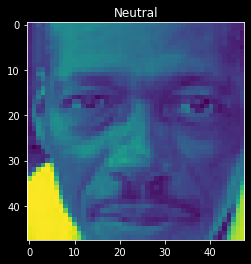

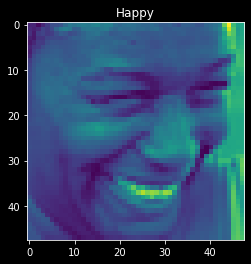

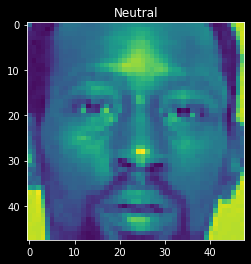

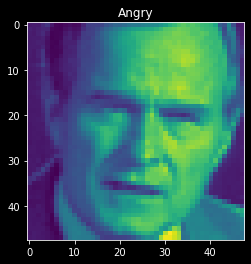

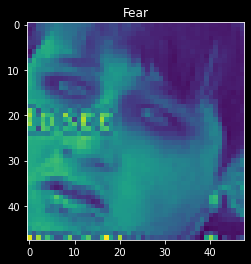

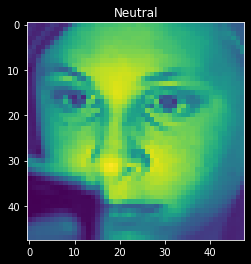

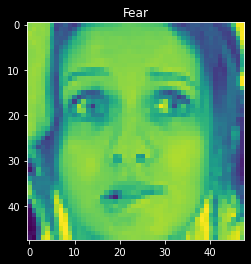

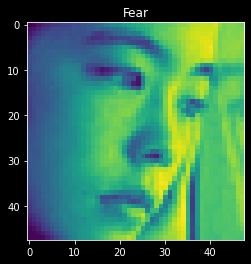

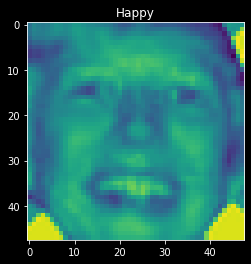

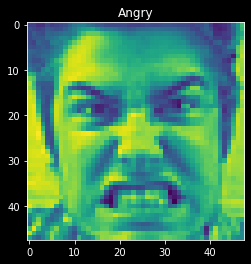

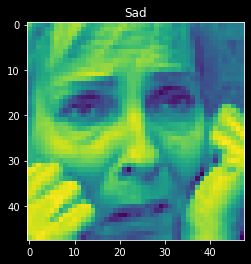

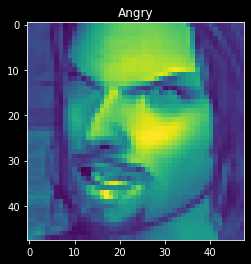

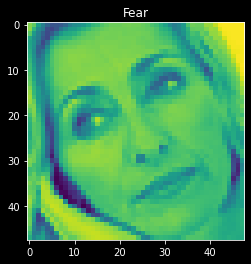

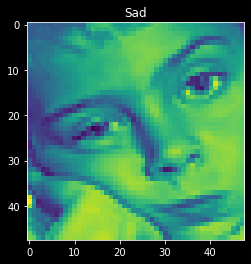

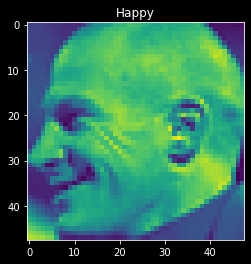

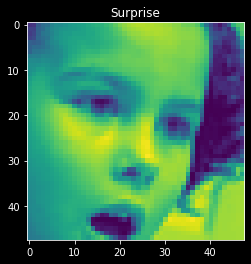

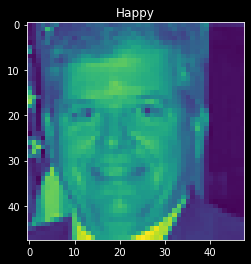

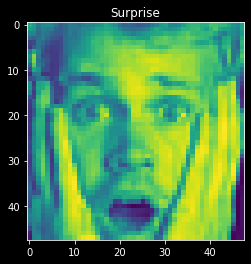

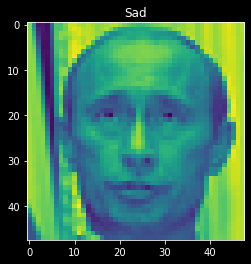

In [59]:
#First set of Test Samples Without Predicted Value
import matplotlib.pyplot  as plt
from Utils_funX import *

for i in range(50):
    plt.title(Decode_Y_Val(y_test[i]))
    plt.imshow(x_test[i])
    plt.show()

In [60]:
#Second Samples With Test Samples(Having test Results) 
x_test1.shape,y_test1.shape

((33018, 48, 48), (33018, 7))

In [ ]:
from keras import models
model1 = models.load_model('CNN_Model_Final.h5')
model.compile(optimizer = 'adam',metrics = ['accuracy'],loss ='categorical_crossentropy' )

In [ ]:
y_pred1 =  model.predict(x_test1,batch_size=100)

In [ ]:
for i in range(50):
    plt.title("TRUE : {}  PREDICTED : {}",Decode_Y_Val(y_test1[i]),Decode_Y_Val(y_pred1[i]))
    plt.imshow(x_test1[i])
    plt.show()

In [61]:
results = model.evaluate(x_test1,y_test1,batch_size=100,verbose=0)

print("Test Loss And Test Accuracy :\n",results)

Test Loss And Test Accuracy :
 [0.3362025320529938, 0.8963898420333862]
